<a href="https://colab.research.google.com/github/ZhiyaoShu/recommendation-system/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

### **The objective:**
In an era where information overload is commonplace, recommendation systems serve as a crucial interface to curate personalized user experiences, thus helping platforms retain and grow their user base amidst stiff competition. The primary goal of this project is to explore and develop three distinct types of recommendation systems (User Similarity-Based, Model-Based Collaborative, and Cluster-Based Systems). By employing different methodologies, this project aims to practice and clarify each approach in providing accurate and meaningful recommendations.


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user


play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import io

from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

!pip install surprise
import surprise as se

# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from math import sqrt
from surprise.model_selection import GridSearchCV
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader, KNNWithMeans, accuracy
from surprise import KNNBasic
from surprise import accuracy

from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader, SVD

from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

### **Load the dataset**

In [ ]:
df_songs = pd.read_csv('/content/drive/MyDrive/000/song_data.csv')
df_counts = pd.read_csv('/content/drive/MyDrive/000/count_data.csv')


### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of songs_df data
print(df_songs.head(10))

              song_id                                              title  \
0  SOQMMHC12AB0180CB8                                       Silent Night   
1  SOVFVAK12A8C1350D9                                        Tanssi vaan   
2  SOGTUKN12AB017F4F1                                  No One Could Ever   
3  SOBNYVR12A8C13558C                                      Si Vos Querés   
4  SOHSBXH12A8C13B0DF                                   Tangle Of Aspens   
5  SOZVAPQ12A8C13B63C  Symphony No. 1 G minor "Sinfonie Serieuse"/All...   
6  SOQVRHI12A6D4FB2D7                                   We Have Got Love   
7  SOEYRFT12AB018936C                                  2 Da Beat Ch'yall   
8  SOPMIYT12A6D4F851E                                            Goodbye   
9  SOJCFMH12A8C13B0C2                         Mama_ mama can't you see ?   

                                release  \
0                 Monster Ballads X-Mas   
1                           Karkuteillä   
2                                B

In [ ]:
# See top 10 records of counts_df data
print(df_counts.head(10))


   Unnamed: 0                                   user_id             song_id  \
0           0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1           1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2           2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3           3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4           4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
5           5  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODDNQT12A6D4F5F7E   
6           6  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODXRTY12AB0180F3B   
7           7  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFGUAY12AB017B0A8   
8           8  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFRQTD12A81C233C0   
9           9  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOHQWYZ12A6D4FA701   

   play_count  
0           1  
1           2  
2           1  
3           1  
4           1  
5           5  
6           1  
7 

### **Check the data types and and missing values of each column**

In [ ]:
# See the info of the counts_df data
print(df_counts.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB
None


In [ ]:
# See the info of the songs_df data
print(df_songs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB
None


In [ ]:
# Left merge the counts and songs data on "song_id". Drop duplicates from song_df data simultaneously
df_songs = df_songs.drop_duplicates(subset='song_id')
df_merge = df_counts.merge(df_songs, on='song_id',how='left')

# Drop the column 'Unnamed: 0'
merged_df = df_merge.drop(columns=['Unnamed: 0'])
## Name the obtained dataframe as "df"
df = merged_df

print(df.head(10))

                                    user_id             song_id  play_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995           1   
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B           2   
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0           1   
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D           1   
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273           1   
5  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODDNQT12A6D4F5F7E           5   
6  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODXRTY12AB0180F3B           1   
7  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFGUAY12AB017B0A8           1   
8  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFRQTD12A81C233C0           1   
9  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOHQWYZ12A6D4FA701           1   

                           title                                release  \
0                       The Cove                     Th

In [ ]:
# Apply label encoding for "user_id" and "song_id"
# Create a label encoder object
le = LabelEncoder()

# Label encoding for 'user_id'
df['user_id'] = le.fit_transform(df['user_id'])

# Reset the label encoder and do label encoding for 'song_id'
df['song_id'] = le.fit_transform(df['song_id'])

print (df.head(10))

   user_id  song_id  play_count                          title  \
0    54961      153           1                       The Cove   
1    54961      413           2                Entre Dos Aguas   
2    54961      736           1                       Stronger   
3    54961      750           1                 Constellations   
4    54961     1188           1                   Learn To Fly   
5    54961     1239           5   Apuesta Por El Rock 'N' Roll   
6    54961     1536           1                  Paper Gangsta   
7    54961     2056           1                 Stacked Actors   
8    54961     2220           1                  Sehr kosmisch   
9    54961     3046           1  Heaven's gonna burn your eyes   

                                 release  \
0                     Thicker Than Water   
1                    Flamenco Para Niños   
2                             Graduation   
3                      In Between Dreams   
4          There Is Nothing Left To Lose   
5        

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down the dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by at least 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Records with play_count more than(>) 5
df=df_final[df_final.play_count>5]

In [ ]:
# Check the shape of the data
print(df.shape)
print(df.head())

(12522, 7)
     user_id  song_id  play_count                       title  \
356    27018      198          20                       Rorol   
359    27018      248           7                    Auto-Dub   
365    27018      318          11  Hilarious Movie Of The 90s   
386    27018      926          11      One Minute To Midnight   
402    27018     1262           6              Lights & Music   

                   release      artist_name  year  
356  Identification Parade  Octopus Project  2002  
359                Skream!           Skream  2006  
365                  Pause         Four Tet  2001  
386                Justice          Justice     0  
402         Lights & Music         Cut Copy  2008  


## **Exploratory Data Analysis**

**Total number of unique user id**

In [ ]:
# Display total number of unique user_id
unique_users = df_final['user_id'].nunique()
print(f"Total number of unique user_id: {unique_users}")

Total number of unique user_id: 3156


In [ ]:
# Total number of unique song_id
unique_songs = df_final['song_id'].nunique()
print(f"Total number of unique song_id: {unique_songs}")

Total number of unique song_id: 563


**Total number of unique artists**

In [ ]:
# Total number of unique artists
unique_artists = df_final['artist_name'].nunique()
print(f"Total number of unique artists: {unique_artists}")

Total number of unique artists: 232


**Songs played in a year**

In [ ]:
df_final = df.dropna(subset=['year'])
df_final = df[df['year'] != 0]

songs_in_a_year=df_final.groupby('year')['song_id'].nunique()

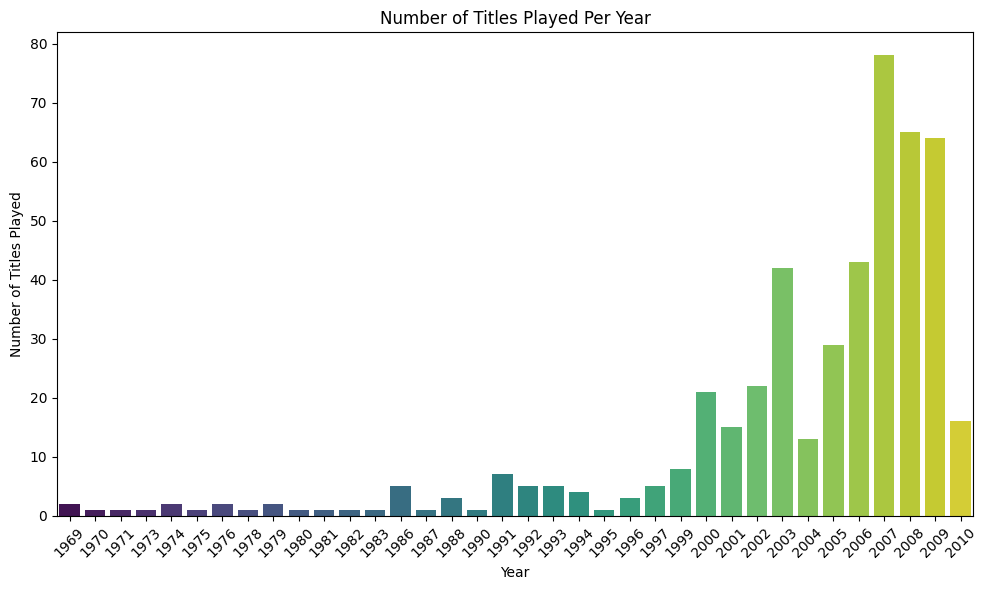

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
plt.figure(figsize = (10, 6))
sn.barplot(x=songs_in_a_year.index, y=songs_in_a_year.values, palette="viridis")


plt.title("Number of Titles Played Per Year")
plt.ylabel("Number of Titles Played")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Building various models**

### Popularity-Based Recommendation Systems

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
play_count = df_final.groupby("song_id")['play_count'].mean()

# Calculating the frequency a song is played
play_freq = df_final.groupby("song_id")['play_count'].size()

print(play_count)
print(play_freq)

song_id
0       3.439394
2       2.358209
4       2.131579
5       5.607692
6       1.920455
          ...   
9993    1.943396
9994    4.396947
9996    1.833333
9997    2.731092
9998    1.526316
Name: play_count, Length: 8227, dtype: float64
song_id
0        66
2        67
4       190
5       130
6        88
       ... 
9993    106
9994    131
9996    138
9997    119
9998     76
Name: play_count, Length: 8227, dtype: int64


In [ ]:
# Making a dataframe with the average_count and play_freq
combine_df = pd.DataFrame({
    'average_play': play_count,
    'song_frequency': play_freq,
}).sort_values(by='average_play', ascending=False).reset_index(drop=True)

combine_df.head()

,average_play,song_frequency
0,18.158228,158
1,16.891892,148
2,16.037500,80
3,15.976000,125
4,15.171756,262


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
# Filter out songs with play counts no less than the 15 (threshold = 15)
def recomendation(df,n,threshold=15):
  recom_songs = play_count[play_count>=threshold]
  top_songs=recom_songs.sort_values(ascending=False).head(n)

  return top_songs

In [ ]:
# Recommend top 10 songs using the function defined above
top_10 = recomendation(df, 10)
print(top_10)

song_id
32      18.158228
1990    16.891892
7839    16.037500
9859    15.976000
3859    15.171756
Name: play_count, dtype: float64


### User Similarity-Based Collaborative Filtering

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [ ]:

# Instantiating Reader scale with rating scale (0, 5)
reader = Reader(rating_scale=(0,5))

# Loading the dataset
data = Dataset.load_from_df(df[["user_id","song_id","play_count"]], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

In [ ]:
# Build the default user-user-similarity model
sim_options = {
    'name': 'cosine',
    'user_based': True  # Compute similarities between users
}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)
predictions = sim_user_user.test(testset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k=30)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 6.7604
Precision:  0.44
Recall:  0.643
F_1 score:  0.522


In [ ]:
# Predicting play_count for a sample user with a listened song

sample_user = df['user_id'].iloc[0]
sample_song_id_listened = df[df['user_id'] == sample_user]['song_id'].iloc[0]

predicted_play_counts_listened = sim_user_user.predict(sample_user, sample_song_id_listened)
print(f"Predicted play_count for user {sample_user} with listened song {sample_song_id_listened}: {predicted_play_counts_listened.est}")

Predicted play_count for user 27018 with listened song 198: 2.32530514540775


In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sample_song_id_not_listened = df[df['user_id'] != sample_user]['song_id'].iloc[0]
prediction = sim_user_user.predict(sample_user, sample_song_id_not_listened)
print(f"Predicted play_count for user {sample_user} with not-listened song {sample_song_id_not_listened}: {prediction.est}")

Predicted play_count for user 27018 with not-listened song 352: 4.75


Now, I try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k':[10,30,50],
    'sim_options':{
        'name': ['cosine','msd','pearson'],
        'min_support':[1,5],
        'user_based':[True]
    }
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse','mae'],cv=3)

# Fitting the data
gs.fit(data)

# Extract the best RMSE score and parameters.
print('Best RMSE score: ', gs.best_score['rmse'])
print('Best parameters: ', gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

In [ ]:
from surprise import KNNBasic
best_params = gs.best_params['rmse']
k = best_params['k']
sim_options = best_params['sim_options']

model = KNNBasic(k=k, sim_options=sim_options)

# Train the best model found in above gridsearch
trainset = data.build_full_trainset()
model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 27018)
user_id = '27018'

not_listened_songs = df[(df['user_id'] != user_id)]['song_id'].unique()

song_not_listened = not_listened_songs[0]

prediction = model.predict(user_id, song_not_listened)

print(f'User {user_id} would rate the {song_not_listened} as : {prediction.est:.2f}')

User 27018 would rate the 198 as : 2.51


Below I implemented a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    all_songs = data['song_id'].unique()

    # Creating an user item interactions matrix
    listened_songs = data[data['user_id']==user_id]['song_id'].unique()

    # Extracting those business ids which the user_id has not visited yet
    listened_songs = set(data[data['user_id'] == user_id]['song_id'])
    all_songs = set(data['song_id'])

    # Looping through each of the business ids which user_id has not interacted yet
    not_listened_songs = all_songs - listened_songs

    # Predicting the ratings for those non visited restaurant ids by this user
    predictions = [algo.predict(user_id, song_id) for song_id in not_listened_songs]
    sorted_predictions = [algo.predict(user_id, song_id) for song_id in not_listened_songs]
    top_recommendations = [(pred.iid,pred.est) for pred in sorted_predictions[:top_n]]

    return top_recommendations

In [ ]:
# Make top 10 recommendations for any user_id with a similarity-based recommendation engine
top_n = 10
top_recommendations = get_recommendations(df, 6958, top_n, model)
print("Recommended Songs:", top_recommendations)

Recommended Songs: [(2048, 2.0), (6148, 1.517029070291005), (21, 3.08), (22, 1.560053445618945), (6175, 2.8), (8224, 1.1791884952890748), (4134, 2.6832539838589686), (2091, 2.8), (6189, 2.7), (6191, 1.729859340901254)]


### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
reader = Reader(rating_scale=(df['play_count'].min(),df['play_count'].max()))
data = Dataset.load_from_df(df[['user_id', 'song_id', 'play_count']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=1)

sim_options = {
    "name":"cosine",
    "user_base": False,
}
algo = KNNWithMeans (sim_option=sim_options)
algo.fit(trainset)

test_pred = algo.test(testset)
rmse = accuracy.rmse(test_pred)

print(f"Item-item collaborative filtering model rmse:{rmse}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 12.4757
Item-item collaborative filtering model rmse:12.475676611567863


In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
user_id = 6958
song_id = 1671
prediction = algo.predict(user_id, song_id)
print(f"Predicted play count for user {user_id} and song {song_id}: {prediction.est}")

Predicted play count for user 6958 and song 1671: 12.052177616867214


In [ ]:
# Apply grid search for enhancing model performance
param_grid = {
    'k': [10,30,50],
    'min_k': [1, 5, 10],
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson'],
        'user_based': [False]
    }
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse','mae'], cv=3)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print('Best RMSE score: ', gs.best_score['rmse'])
print('Best parameters: ', gs.best_params['rmse'])


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [ ]:
# Apply the best modle found in the grid search
best_algo = KNNWithMeans(k=best_params['k'],
                         sim_options=best_params['sim_options'])

# Train the best model on the full dataset
trainset = data.build_full_trainset()
best_algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
# Assuming user_id is '6958' and song_id is '1671'
user_id = '6958'
song_id = '1671'

# Make a prediction
prediction = best_algo.predict(user_id, song_id)

# The estimated play_count
print("Estimated play_count for user {} on song {}: {}".format(user_id, song_id, prediction.est))


Estimated play_count for user 6958 on song 1671: 11.927327902890912


In [ ]:
def ranking_songs(user_id, all_songs, best_algo, top_n=10):
    # List to store predictions
    predictions = []

    # Generate predictions for each song
    for song_id in all_songs:
        prediction = best_algo.predict(user_id, song_id)
        predictions.append((song_id, prediction.est))

    # Sort the predictions in descending order of estimated play counts
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Return the top N song IDs
    return [song_id for song_id, _ in predictions[:top_n]]

all_songs = df['title'].unique()
top_songs = ranking_songs(user_id, all_songs, best_algo, top_n=10)

print(top_songs)

['Rorol', 'Auto-Dub', 'Hilarious Movie Of The 90s', 'One Minute To Midnight', 'Lights & Music', 'Neon Knights', 'Hold The Ladder', "Ghosts 'n' Stuff (Original Instrumental Mix)", 'Feel The Love', "She's Good For Business"]


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
n_latent_features = 20
svd = TruncatedSVD(n_components=n_latent_features)
user_song_interactions = df_counts.pivot(index='user_id', columns='song_id', values='play_count').fillna(0)
user_song_interactions_matrix = csr_matrix(user_song_interactions.values)


latent_matrix = svd.fit_transform(user_song_interactions_matrix)

print(f"Shape of latent matrix: {latent_matrix.shape}")

# Build baseline model using svd

user_song_interactions_matrix = csr_matrix(user_song_interactions.values)

Shape of latent matrix: (76353, 20)


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(df_counts[['user_id', 'song_id', 'play_count']], reader)

# Split the data into training and testing sets
trainset = data.build_full_trainset()

trainset = data.build_full_trainset()
svd = SVD()
svd.fit(trainset)

In [ ]:
user_id = 6958
song_id = 1671
r_ui = 2  # This is the true rating

# Making prediction
prediction = svd.predict(user_id, song_id, r_ui=r_ui)
predicted_rating = prediction.est
print(f'Predicted rating: {predicted_rating}')

Predicted rating: 3.0454845


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {
    'n_epochs': [5, 10],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.4]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



6.860128766339876
{'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4}


In [ ]:
# Building the optimized SVD model using optimal hyperparameters
optimal_params = gs.best_params['rmse']
optimized_svd = SVD(n_epochs=optimal_params['n_epochs'],
                    lr_all=optimal_params['lr_all'],
                    reg_all=optimal_params['reg_all'])
optimized_svd.fit(trainset)
trainset = data.build_full_trainset()

In [ ]:
# Making prediction
all_items = df['song_id'].unique().tolist()
predictions = [optimized_svd.predict(user_id, iid) for iid in all_items]

# Getting top 10 recommendations for random user_id using "svd_optimized" algorithm
def get_top_n(predictions, n=10, user_id=6958):
    top_n = {}
    for prediction in predictions:
        uid, iid, est = prediction.uid, prediction.iid, prediction.est
        if uid == user_id:
            top_n.setdefault(uid, []).append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n_recommendations = get_top_n(predictions, n=10, user_id=6958)

In [ ]:
# Ranking songs based on above recommendations
print(f"Top 10 song recommendations for user {user_id}, ranked by predicted rating:")
for rank, (song_id, predicted_rating) in enumerate(top_n_recommendations.get(user_id, []), start=1):
    print(f'Rank {rank}: Song ID {song_id}, Predicted Rating: {predicted_rating:.2f}')


Top 10 song recommendations for user 6958, ranked by predicted rating:
Rank 1: Song ID 198, Predicted Rating: 3.05
Rank 2: Song ID 248, Predicted Rating: 3.05
Rank 3: Song ID 318, Predicted Rating: 3.05
Rank 4: Song ID 926, Predicted Rating: 3.05
Rank 5: Song ID 1262, Predicted Rating: 3.05
Rank 6: Song ID 1472, Predicted Rating: 3.05
Rank 7: Song ID 1571, Predicted Rating: 3.05
Rank 8: Song ID 1811, Predicted Rating: 3.05
Rank 9: Song ID 1936, Predicted Rating: 3.05
Rank 10: Song ID 2615, Predicted Rating: 3.05


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

user_item_matrix = df.pivot(index='user_id', columns='song_id', values='play_count').fillna(0)
scaler = StandardScaler()
user_item_matrix_scaled = scaler.fit_transform(user_item_matrix)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model
user_clusters = kmeans.fit_predict(user_item_matrix_scaled)

# Add cluster labels to the user_item_matrix
user_item_matrix['cluster'] = user_clusters



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Empty DataFrame
Columns: [user_id, song_id, play_count, title, release, artist_name, year]
Index: []


In [ ]:
def recommend_songs(user_id, user_item_matrix, top_n=10):
    # Find the user's cluster
    user_cluster = user_item_matrix.loc[user_id, 'cluster']

    # Filter the matrix to include only users from the same cluster
    cluster_data = user_item_matrix[user_item_matrix['cluster'] == user_cluster]

    # Calculate the mean play_count for each song in the cluster
    song_recommendations = cluster_data.drop('cluster', axis=1).mean().sort_values(ascending=False)

    # Get the top N song recommendations
    return song_recommendations.head(top_n).index.tolist()

In [ ]:
user_id = df['user_id'].sample(n=1).iloc[0]
recommended_songs = recommend_songs(user_id, user_item_matrix, top_n=10)
print(f"Recommended Songs for User {user_id}: {recommended_songs}")

Recommended Songs for User 19161: [317, 614, 7416, 6246, 352, 1664, 2220, 5531, 7913, 5645]


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

# Set the parameter space to tune
param_grid = {
    'n_clusters': [3, 5, 7, 10],
    'init': ['k-means++', 'random'],
    'n_init': [10, 15, 20]
}

# Iterate over parameter combinations
for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for n_init in param_grid['n_init']:
            # Configure KMeans with the current set of parameters
            kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42)

            # Fit the model
            user_clusters = kmeans.fit_predict(user_item_matrix_scaled)

            # Evaluate the model using silhouette score
            silhouette_avg = silhouette_score(user_item_matrix_scaled, user_clusters)

            # Update best parameters and score if current score is better
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'n_init': n_init}

print(f'Best parameters: {best_params}')
print(f'Best silhouette score: {best_score}')

Best parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10}
Best silhouette score: 0.7560382053573051


In [ ]:
from surprise import CoClustering, Dataset, Reader
from surprise.model_selection import cross_validate

# Train the tuned Coclustering algorithm
coclustering = CoClustering(n_cltr_u=3, n_cltr_i=3, n_epochs=20)
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['user_id', 'song_id', 'play_count']], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
coclustering.fit(trainset)

In [ ]:
# Using co_clustering_optimized model to recommend for the random user and any song
user_id = df['user_id'].sample(n=1).iloc[0]
song_id = df['song_id'].sample(n=1).iloc[0]

predicted_rating = coclustering.predict(user_id, song_id).est
print(f'Predicted rating for user {user_id} and item {song_id}: {predicted_rating}')

Predicted rating for user 11799 and item 8094: 4.33994942815162


### Content Based Recommendation Systems

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df['text'] = df.apply(lambda row: ' '.join(row[['title', 'release', 'artist_name']]), axis=1)

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df data
selected_columns = df[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df.drop_duplicates(subset='title')

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,release,artist_name,year,text
title,,,,,,,
Rorol,27018,198,20,Identification Parade,Octopus Project,2002,Rorol Identification Parade Octopus Project
Auto-Dub,27018,248,7,Skream!,Skream,2006,Auto-Dub Skream! Skream
Hilarious Movie Of The 90s,27018,318,11,Pause,Four Tet,2001,Hilarious Movie Of The 90s Pause Four Tet
One Minute To Midnight,27018,926,11,Justice,Justice,0,One Minute To Midnight Justice Justice
Lights & Music,27018,1262,6,Lights & Music,Cut Copy,2008,Lights & Music Lights & Music Cut Copy


In [ ]:
# Create the series of indices from the data
df_small_index = df_small.index

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
!pip install nltk
nltk.download('punkt')
!pip install wordnet
nltk.download('wordnet')
!pip install stopwords
nltk.download('stopwords')

import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create a **function to pre-process the text data:**

In [ ]:
from nltk.sem.drt import Tokens
# Create a function to tokenize the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and stem the words
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    processed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Return the processed text
    return ' '.join(processed_tokens)

df_small['processed_text'] = df_small['text'].apply(preprocess_text)

# See the first 5 records of the df_small dataset
print(df_small.head())

                            user_id  song_id  play_count  \
title                                                      
Rorol                         27018      198          20   
Auto-Dub                      27018      248           7   
Hilarious Movie Of The 90s    27018      318          11   
One Minute To Midnight        27018      926          11   
Lights & Music                27018     1262           6   

                                          release      artist_name  year  \
title                                                                      
Rorol                       Identification Parade  Octopus Project  2002   
Auto-Dub                                  Skream!           Skream  2006   
Hilarious Movie Of The 90s                  Pause         Four Tet  2001   
One Minute To Midnight                    Justice          Justice     0   
Lights & Music                     Lights & Music         Cut Copy  2008   

                                              

In [ ]:
# Create tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_matrix = tfidf_vectorizer.fit_transform(df_small['processed_text'])

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to an array and print it
tfidf_array = tfidf_matrix.toarray()

print("Feature names:", feature_names)

Feature names: ['08' '09' '15' ... 'zapotec' 'zero' 'éxito']


In [ ]:
# Compute the cosine similarity for the tfidf above output
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.46289441]
 [0.         0.         0.         ... 0.         0.46289441 1.        ]]


 Finally, Create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def get_similar_songs(title, cosine_sim, df, top_n=10):
    """
    Get the most similar songs for a given song title based on cosine similarity.

    Args:
    title (str): The title of the song.
    cosine_sim (numpy.ndarray): The cosine similarity matrix.
    df (pd.DataFrame): DataFrame containing the song titles.
    top_n (int): Number of top similar songs to return.

    Returns:
    list: A list of top_n similar song titles.
    """
    # Check if the song is in the DataFrame
    if title not in df.index:
        raise ValueError(f"Song '{title}' not found in the dataset.")

    # Get the index of the song
    idx = df.index.get_loc(title)

    # Get the cosine similarity scores for this song with all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top_n most similar songs (excluding itself)
    sim_scores = sim_scores[1:top_n+1]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top_n most similar songs
    return df.iloc[song_indices].index.tolist()


Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Feel The Love'
song_title = 'Feel The Love'
similar_songs = get_similar_songs(song_title, cosine_sim, df_small, top_n=5)

print(f"Songs similar to '{song_title}':")
for song in similar_songs:
    print(song)

Songs similar to 'Feel The Love':
Out There On The Ice
Far Away
Strangers In The Wind
Hearts On Fire
Lights & Music
